### 1. Imports

In [78]:
import pickle
import time

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

#data preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# ML algorithms
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from xgboost import XGBClassifier
from xgboost import plot_importance

#cross validation
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import StratifiedKFold

# evaluation metrics
from sklearn.metrics import roc_curve, roc_auc_score, accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score, classification_report

import warnings
warnings.filterwarnings('ignore')

### 2. Reading Data

In [79]:
df_s = pd.read_csv('static_dataset.csv')

In [80]:
df_s.shape

(268074, 16)

In [81]:
df_s.head()

,timestamp,FQDN_count,subdomain_length,upper,lower,numeric,entropy,special,labels,labels_max,labels_average,longest_word,sld,len,subdomain,Target Attack
0,56:19.8,27,10,0,10,11,2.570417,6,6,7,3.666667,2,192,14,1,1
1,07:23.9,27,10,0,10,11,2.767195,6,6,7,3.666667,2,192,14,1,1
2,23:15.1,26,9,0,10,10,2.742338,6,6,7,3.500000,2,192,13,1,0
3,04:51.9,27,10,0,10,11,2.570417,6,6,7,3.666667,2,192,14,1,1
4,12:44.0,15,9,0,11,0,2.929439,4,3,5,4.333333,local,local,15,1,1


In [82]:
df_s[df_s['Target Attack'] == 0].head()

,timestamp,FQDN_count,subdomain_length,upper,lower,numeric,entropy,special,labels,labels_max,labels_average,longest_word,sld,len,subdomain,Target Attack
2,23:15.1,26,9,0,10,10,2.742338,6,6,7,3.500000,2,192,13,1,0
6,26:58.3,23,3,0,20,0,3.568087,3,3,16,7.000000,pforzheim,pforzheim-bisons,20,1,0
8,27:59.6,14,3,0,12,0,2.514247,2,3,6,4.000000,face,reface,10,1,0
9,21:27.9,18,0,0,17,0,2.879113,1,2,14,8.500000,store,dellogliostore,15,0,0
10,09:54.6,24,7,0,10,8,2.054029,6,6,7,3.166667,4,224,11,1,0


In [83]:
df_s[df_s['Target Attack'] == 1].head()

,timestamp,FQDN_count,subdomain_length,upper,lower,numeric,entropy,special,labels,labels_max,labels_average,longest_word,sld,len,subdomain,Target Attack
0,56:19.8,27,10,0,10,11,2.570417,6,6,7,3.666667,2,192,14,1,1
1,07:23.9,27,10,0,10,11,2.767195,6,6,7,3.666667,2,192,14,1,1
3,04:51.9,27,10,0,10,11,2.570417,6,6,7,3.666667,2,192,14,1,1
4,12:44.0,15,9,0,11,0,2.929439,4,3,5,4.333333,local,local,15,1,1
5,16:29.5,27,10,0,10,11,2.570417,6,6,7,3.666667,2,192,14,1,1


### 3. Exploratory Data analysis

In [84]:
print('No. of rows in static data = ', df_s.shape[0],'\n', 'No. of columns in static data = ', df_s.shape[1])

No. of rows in static data =  268074 
 No. of columns in static data =  16


In [85]:
df_s.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 268074 entries, 0 to 268073
Data columns (total 16 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   timestamp         268074 non-null  object 
 1   FQDN_count        268074 non-null  int64  
 2   subdomain_length  268074 non-null  int64  
 3   upper             268074 non-null  int64  
 4   lower             268074 non-null  int64  
 5   numeric           268074 non-null  int64  
 6   entropy           268074 non-null  float64
 7   special           268074 non-null  int64  
 8   labels            268074 non-null  int64  
 9   labels_max        268074 non-null  int64  
 10  labels_average    268074 non-null  float64
 11  longest_word      268066 non-null  object 
 12  sld               268074 non-null  object 
 13  len               268074 non-null  int64  
 14  subdomain         268074 non-null  int64  
 15  Target Attack     268074 non-null  int64  
dtypes: float64(2), int64

In [86]:
# unique value count for static data

for i in df_s.columns:
    print(df_s[i].value_counts(dropna= False))
    

49:26.7    46
49:27.5    43
49:27.1    42
49:27.4    39
49:26.9    35
           ..
50:34.9     1
55:49.7     1
55:37.6     1
42:13.2     1
28:01.6     1
Name: timestamp, Length: 35924, dtype: int64
24    70912
27    64479
25    23614
26    22065
15     8775
13     7084
14     6976
16     6675
11     6627
12     6511
32     6377
10     5709
17     4712
18     3952
9      3885
19     3221
28     2729
8      2455
20     2178
21     2150
22     1433
7      1419
6      1235
23     1087
2      1008
29      238
5       143
31      130
34       93
4        76
30       53
33       46
36       14
35       13
Name: FQDN_count, dtype: int64
7     70251
0     66081
10    65472
8     23266
9     22125
3     17039
11     2616
15      319
4       166
2       155
5       119
6        99
17       98
20       72
12       69
13       33
14       22
16       20
18       18
1        17
22        8
21        4
19        3
23        2
Name: subdomain_length, dtype: int64
0     258759
32      6345
11      196

In [87]:
# get number of unique values in each feature
cat = []

for col in df_s.columns[:-1]:
    print(col, " : " ,len(df_s[col].unique()))
    if len(df_s[col].unique()) < 10:
        cat.append(col)


timestamp  :  35924
FQDN_count  :  34
subdomain_length  :  24
upper  :  5
lower  :  34
numeric  :  13
entropy  :  630
special  :  8
labels  :  7
labels_max  :  31
labels_average  :  73
longest_word  :  6225
sld  :  11112
len  :  32
subdomain  :  2


In [88]:
# considering variables with less than 10 unique groups as categorical variables
# upper, special, labels, subdomain
cat

['upper', 'special', 'labels', 'subdomain']

In [89]:
for col in cat:
    print('unique categories in ', col, ' : ', df_s[col].unique())

unique categories in  upper  :  [ 0 32 11  2  8]
unique categories in  special  :  [6 4 3 2 1 0 5 7]
unique categories in  labels  :  [6 3 2 1 4 5 7]
unique categories in  subdomain  :  [1 0]


In [90]:
#finding columns with Null
for i in df_s.columns:
    k = df_s[i].isnull().sum()
    if(k>0):
        print(i)

longest_word


### Observations:

### 1. Original nature of variables may be hidden due to confidentiality
### 2. From the about unique category counts it can be concluded that upper, special, labels, 
### subdomain can be categorical variables encoded as integers
### 3. The column longest_word has some missing values

### checking for data imbalance

In [91]:
#Checking Data Imbalance // Uniques value counts in 'Target Attack' // 

uv = pd.DataFrame(df_s['Target Attack'].value_counts(dropna =False))
uv  # 1 - Attack
    # 0 - Not an Attack

,Target Attack
1,147179
0,120895


In [92]:
# Function to print height of barcharts on the bars

def barh(ax):
    
    for p in ax.patches:
        val = p.get_height() #height of the bar
        x = p.get_x()+ p.get_width()/2 # x- position 
        y = p.get_y() + p.get_height() + 500 #y-position
        ax.annotate(round(val,2),(x,y))

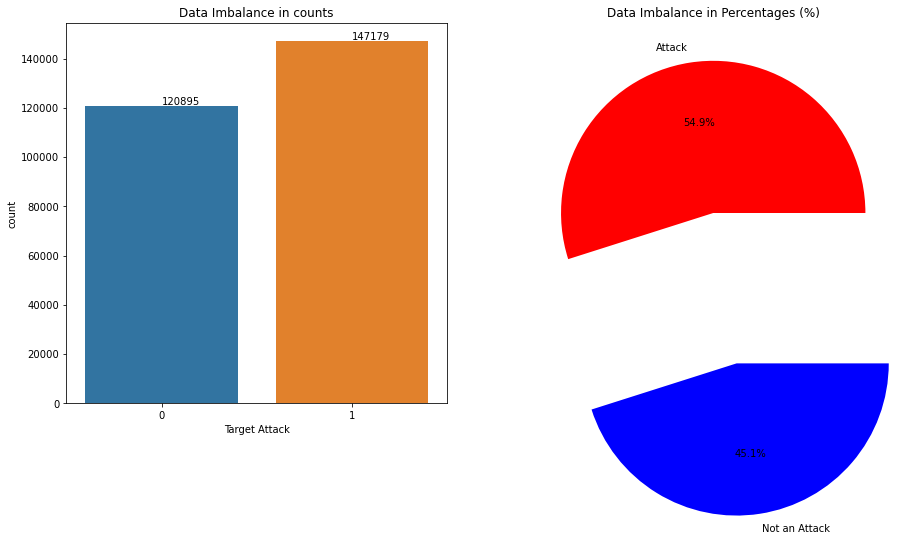

In [93]:
# Ploting imbalance in dataframe 

plt.figure(figsize = (15,7))

cols = ['r','b']

plt.subplot(1,2,1)
ax0 = sns.countplot(x = 'Target Attack',data = df_s)
barh(ax0)
plt.title('Data Imbalance in counts')

plt.subplot(1,2,2)
labels = ['Attack','Not an Attack' ]

plt.pie(uv['Target Attack'], labels=labels, autopct='%1.1f%%',explode = (0,1),colors = cols)
plt.title('Data Imbalance in Percentages (%)')


plt.show()

### 3.1 Searching for Outliers

In [94]:
cols = df_s.columns[:-1]
cols

Index(['timestamp', 'FQDN_count', 'subdomain_length', 'upper', 'lower',
       'numeric', 'entropy', 'special', 'labels', 'labels_max',
       'labels_average', 'longest_word', 'sld', 'len', 'subdomain'],
      dtype='object')

In [95]:
# Only obtain numerical columns

num_cols = [col for col in cols if df_s[col].dtype !='O']
num_cols

['FQDN_count',
 'subdomain_length',
 'upper',
 'lower',
 'numeric',
 'entropy',
 'special',
 'labels',
 'labels_max',
 'labels_average',
 'len',
 'subdomain']

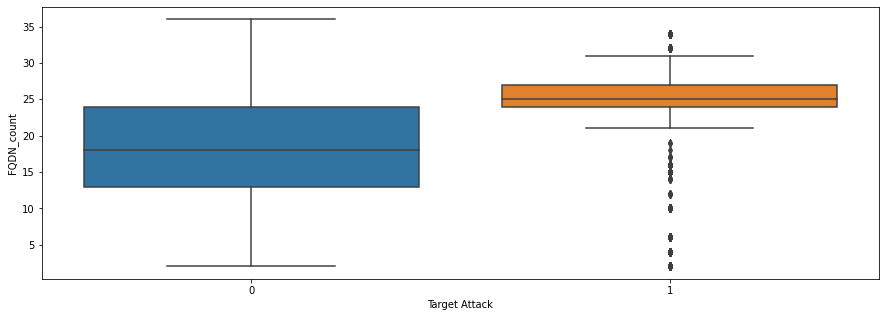

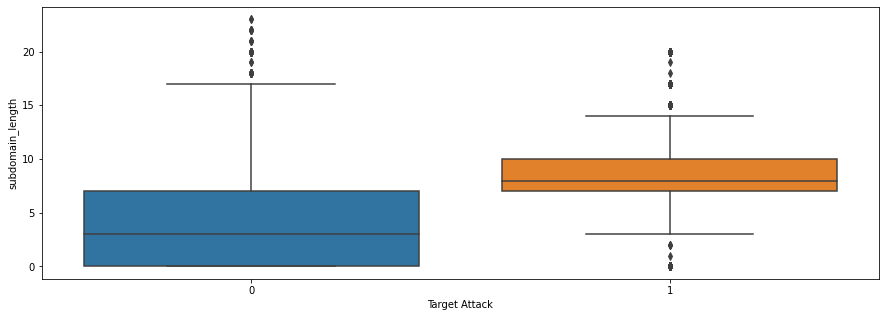

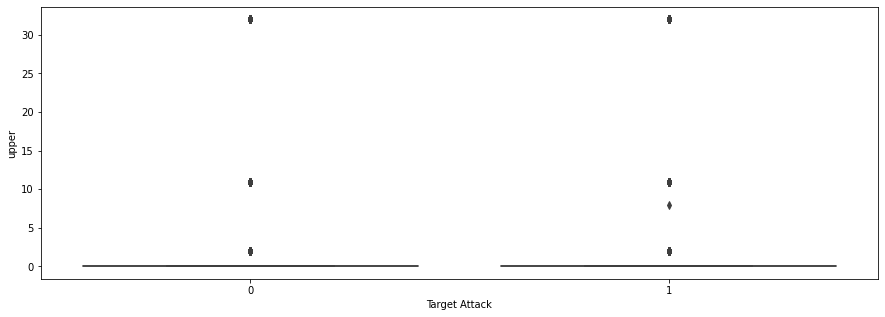

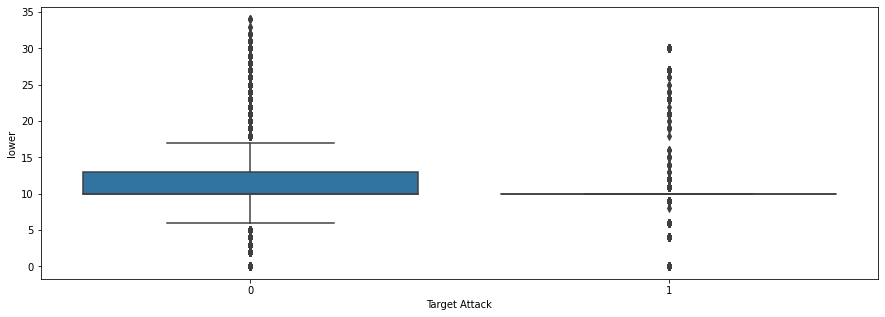

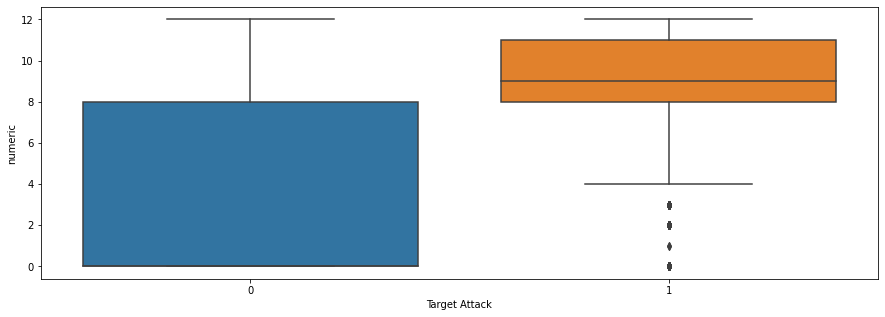

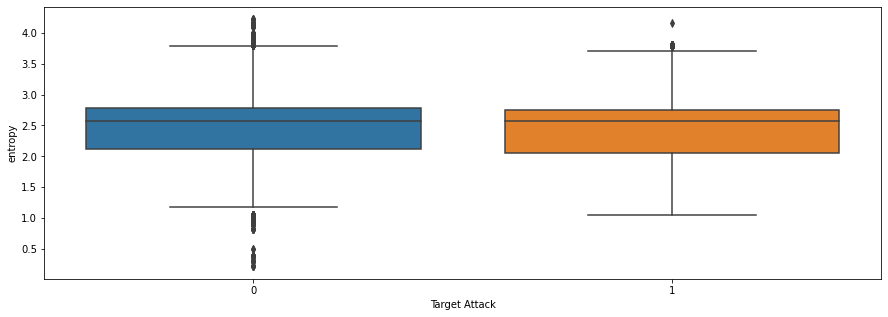

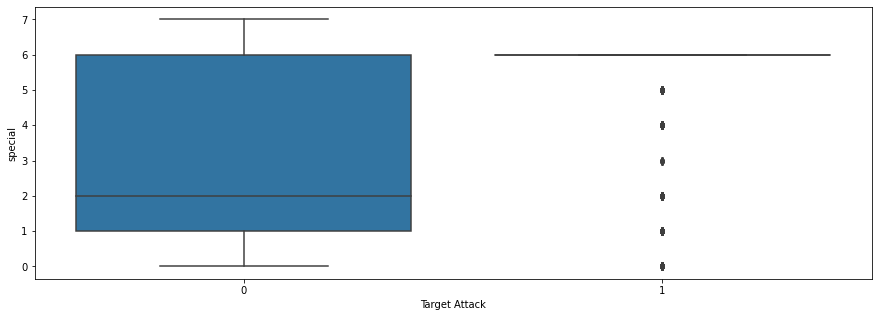

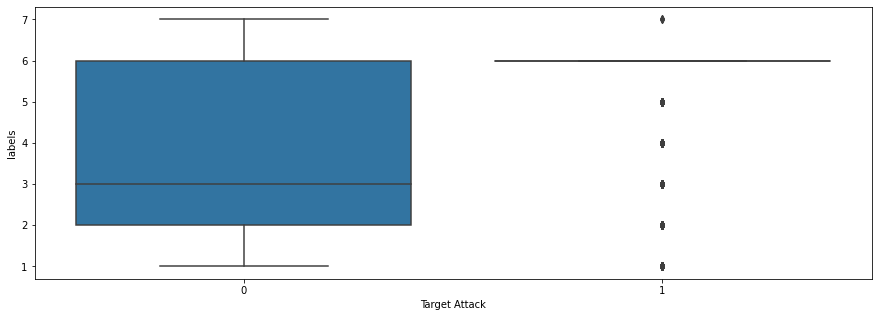

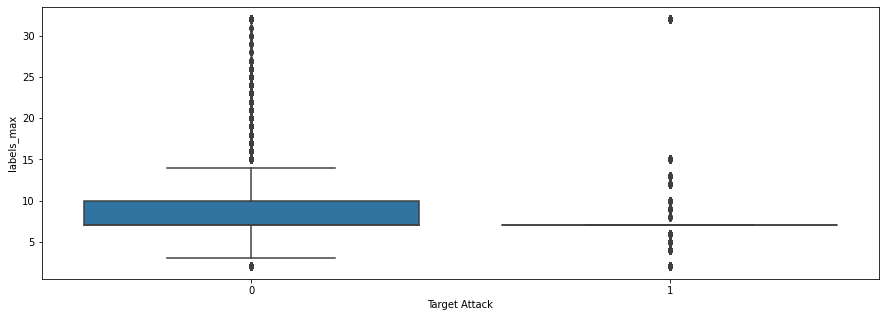

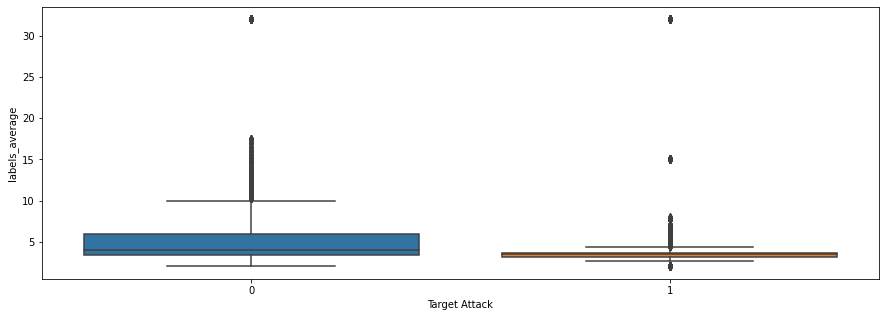

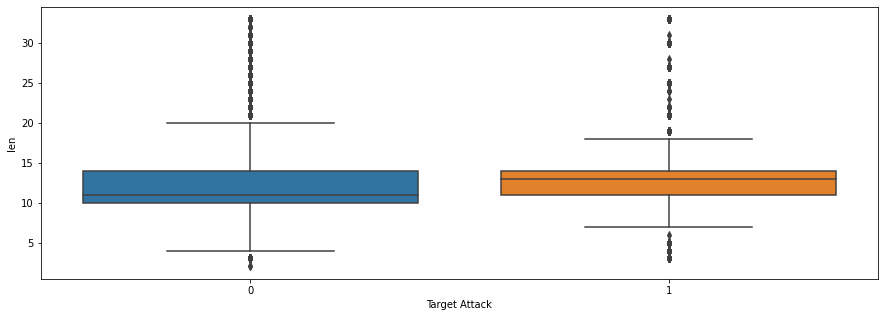

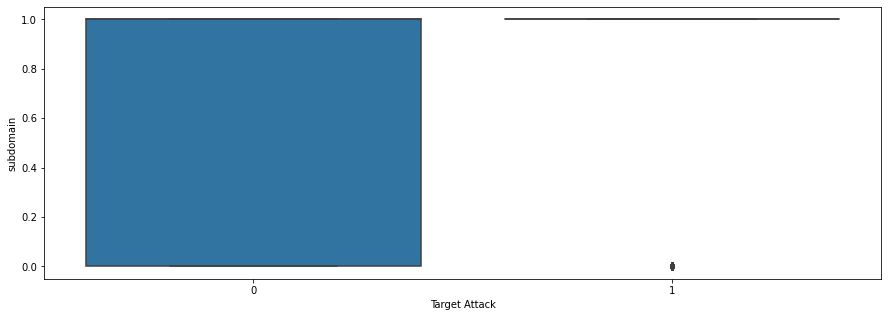

In [96]:
# Plotting boxplots to see the distribution of each variable with 'Target Attack'

for col in num_cols:
    plt.figure(figsize=(15,5))
    sns.boxplot(x='Target Attack', y=col, data=df_s)
    plt.show()

## outliers are present in almost all numerical features

In [97]:
# detect outliers using describe and percentiles

df_s.describe(percentiles = [0.05, 0.25, 0.5, 0.75, 0.8, 0.85, 0.95, 0.99, 0.995])

,FQDN_count,subdomain_length,upper,lower,numeric,entropy,special,labels,labels_max,labels_average,len,subdomain,Target Attack
count,268074.000000,268074.000000,268074.000000,268074.000000,268074.000000,268074.000000,268074.000000,268074.000000,268074.000000,268074.000000,268074.000000,268074.000000,268074.000000
mean,22.286596,6.059021,0.845420,10.410014,6.497586,2.485735,4.533577,4.788823,8.252233,4.802239,12.576714,0.753497,0.549024
std,6.001205,3.899505,4.941929,3.207725,4.499866,0.407709,2.187683,1.803256,4.415355,4.573066,4.177828,0.430975,0.497592
min,2.000000,0.000000,0.000000,0.000000,0.000000,0.219195,0.000000,1.000000,2.000000,2.000000,2.000000,0.000000,0.000000
5%,10.000000,0.000000,0.000000,7.000000,0.000000,2.054029,1.000000,2.000000,5.000000,3.166667,7.000000,0.000000,0.000000
25%,18.000000,3.000000,0.000000,10.000000,0.000000,2.054029,2.000000,3.000000,7.000000,3.166667,11.000000,1.000000,0.000000
50%,24.000000,7.000000,0.000000,10.000000,8.000000,2.570417,6.000000,6.000000,7.000000,3.666667,12.000000,1.000000,1.000000
75%,27.000000,10.000000,0.000000,10.000000,10.000000,2.767195,6.000000,6.000000,7.000000,4.000000,14.000000,1.000000,1.000000
80%,27.000000,10.000000,0.000000,10.000000,11.000000,2.767195,6.000000,6.000000,8.000000,5.000000,14.000000,1.000000,1.000000
85%,27.000000,10.000000,0.000000,12.000000,11.000000,2.786216,6.000000,6.000000,10.000000,5.666667,14.000000,1.000000,1.000000


In [98]:
### subdomain_length, lower, entropy possibly have outliers
### upper, special, labels, subdomain - assumed to be categorical but encoded as integers

#### Observation :
###  FQDN_count, subdomain_length, lower, labels_max, labels_average, len - outliers
### Clearly these are outliers. 
### It is decided to remove rows where values of each column are greater than their respective 95 percentile 
### (as number of records are available are more).



In [99]:
df = df_s.loc[(df_s['FQDN_count'] <= df_s['FQDN_count'].quantile(0.95)) & 
              (df_s['subdomain_length'] <= df_s['subdomain_length'].quantile(0.95)) & 
              (df_s['lower'] <= df_s['lower'].quantile(0.95)) & 
              (df_s['labels_max'] <= df_s['labels_max'].quantile(0.95)) &
              (df_s['labels_average'] <= df_s['labels_average'].quantile(0.95)) &
              (df_s['len'] <= df_s['len'].quantile(0.95))]
    
df.describe(percentiles = [0.05,0.25,0.5,0.75,0.8,0.85,0.95,0.99,0.995])


,FQDN_count,subdomain_length,upper,lower,numeric,entropy,special,labels,labels_max,labels_average,len,subdomain,Target Attack
count,243993.000000,243993.000000,243993.000000,243993.000000,243993.000000,243993.000000,243993.000000,243993.000000,243993.000000,243993.000000,243993.000000,243993.000000,243993.000000
mean,22.078580,6.426635,0.008263,10.287098,6.977479,2.435204,4.805740,5.024447,7.227752,3.845150,11.705094,0.792564,0.567639
std,5.978029,3.676351,0.128284,1.691725,4.278127,0.369467,2.027313,1.651158,1.515324,1.082362,2.310500,0.405472,0.495405
min,2.000000,0.000000,0.000000,0.000000,0.000000,0.219195,0.000000,1.000000,2.000000,2.000000,2.000000,0.000000,0.000000
5%,10.000000,0.000000,0.000000,8.000000,0.000000,2.054029,1.000000,2.000000,5.000000,3.166667,7.000000,0.000000,0.000000
25%,17.000000,3.000000,0.000000,10.000000,1.000000,2.054029,3.000000,3.000000,7.000000,3.166667,11.000000,1.000000,0.000000
50%,24.000000,7.000000,0.000000,10.000000,8.000000,2.570417,6.000000,6.000000,7.000000,3.500000,12.000000,1.000000,1.000000
75%,27.000000,10.000000,0.000000,10.000000,11.000000,2.742338,6.000000,6.000000,7.000000,3.666667,14.000000,1.000000,1.000000
80%,27.000000,10.000000,0.000000,10.000000,11.000000,2.767195,6.000000,6.000000,7.000000,4.000000,14.000000,1.000000,1.000000
85%,27.000000,10.000000,0.000000,11.000000,11.000000,2.767195,6.000000,6.000000,7.000000,4.666667,14.000000,1.000000,1.000000


### 3.2 Check for missing/ null values

In [100]:
df.isnull().sum()

timestamp           0
FQDN_count          0
subdomain_length    0
upper               0
lower               0
numeric             0
entropy             0
special             0
labels              0
labels_max          0
labels_average      0
longest_word        8
sld                 0
len                 0
subdomain           0
Target Attack       0
dtype: int64

In [101]:
df.dropna(inplace= True)

In [102]:
df.isnull().sum()

timestamp           0
FQDN_count          0
subdomain_length    0
upper               0
lower               0
numeric             0
entropy             0
special             0
labels              0
labels_max          0
labels_average      0
longest_word        0
sld                 0
len                 0
subdomain           0
Target Attack       0
dtype: int64

### 3.3 Checking Skewness

In [103]:
num_cols

['FQDN_count',
 'subdomain_length',
 'upper',
 'lower',
 'numeric',
 'entropy',
 'special',
 'labels',
 'labels_max',
 'labels_average',
 'len',
 'subdomain']

<Figure size 1440x504 with 0 Axes>

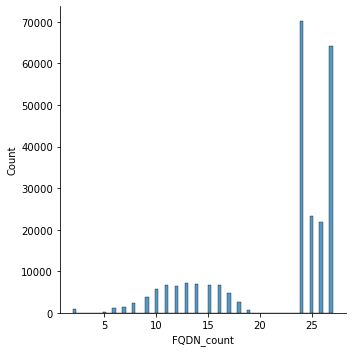

<Figure size 1440x504 with 0 Axes>

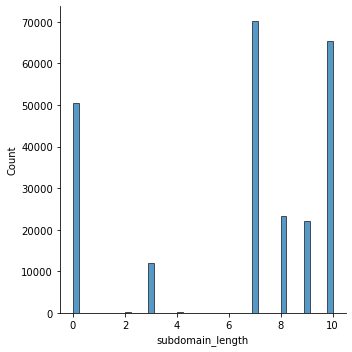

<Figure size 1440x504 with 0 Axes>

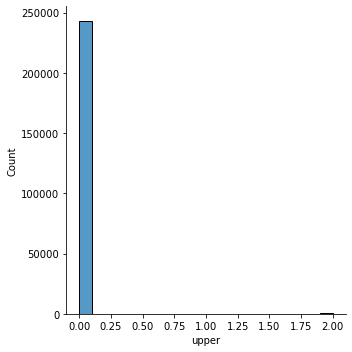

<Figure size 1440x504 with 0 Axes>

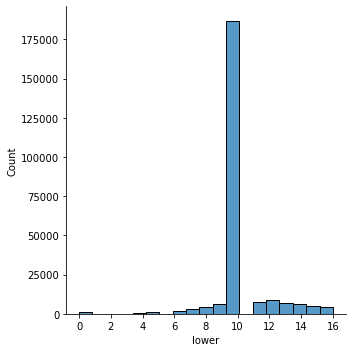

<Figure size 1440x504 with 0 Axes>

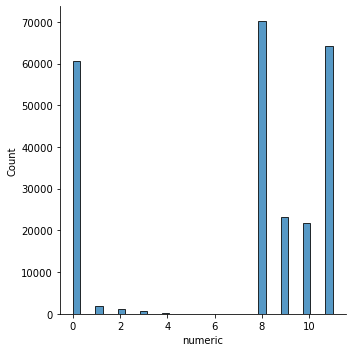

<Figure size 1440x504 with 0 Axes>

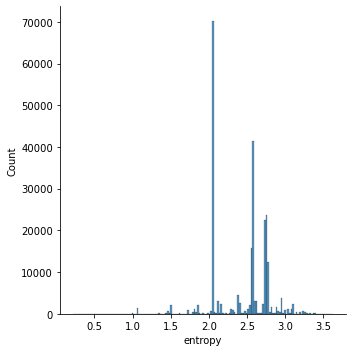

<Figure size 1440x504 with 0 Axes>

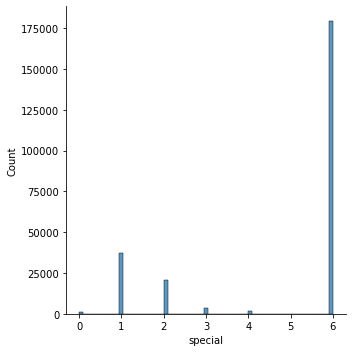

<Figure size 1440x504 with 0 Axes>

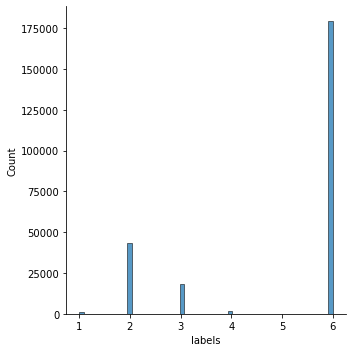

<Figure size 1440x504 with 0 Axes>

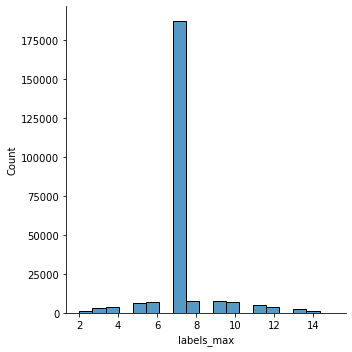

<Figure size 1440x504 with 0 Axes>

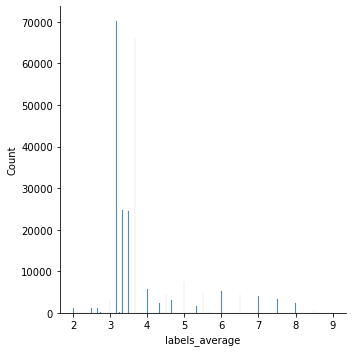

<Figure size 1440x504 with 0 Axes>

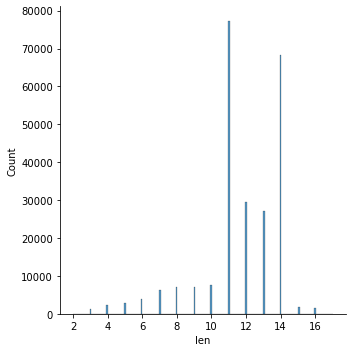

<Figure size 1440x504 with 0 Axes>

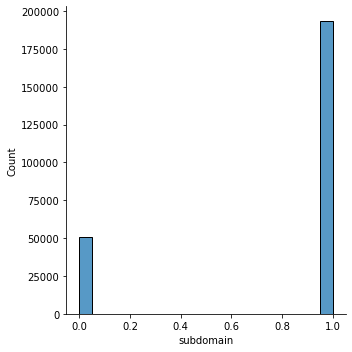

In [104]:
for i, col in enumerate(num_cols):
    plt.figure(figsize= (6,3))
    sns.displot(df[col], kde_kws={'bw': 0.05})
    plt.show()
    

In [105]:
# for a good model, data should be in form of bell curve
# if skewness is present in data - left skewed or right skewed - model wont give good results
# do skewness treatment and convert data to NORMAL DISTRIBUTION


### Observation
### 1. Above plots show variables are categorical in nature
### 2. No skeness treatment is required

## 4. Feature Engineering

In [109]:
df.shape

(243985, 16)

In [110]:
df.columns

Index(['timestamp', 'FQDN_count', 'subdomain_length', 'upper', 'lower',
       'numeric', 'entropy', 'special', 'labels', 'labels_max',
       'labels_average', 'longest_word', 'sld', 'len', 'subdomain',
       'Target Attack'],
      dtype='object')

<AxesSubplot:>

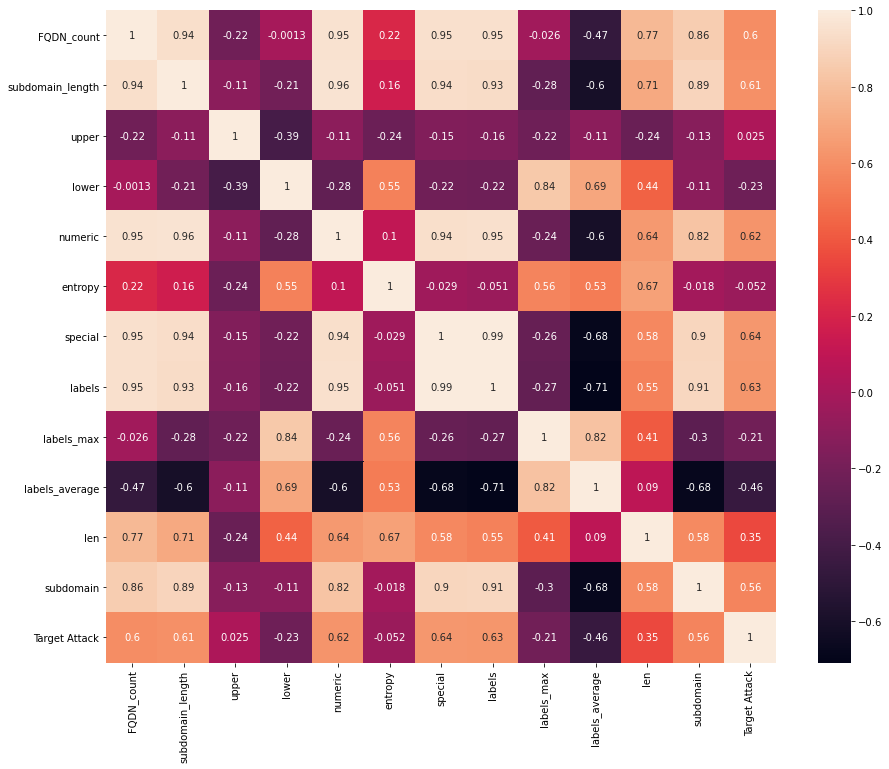

In [111]:
# Correlation matrix
cor = df.corr()

plt.figure(figsize= (15, 12))

sns.heatmap(cor, annot= True)

In [112]:
cor['Target Attack'].sort_values()

labels_average     -0.457061
lower              -0.227523
labels_max         -0.207929
entropy            -0.051541
upper               0.025255
len                 0.346266
subdomain           0.564164
FQDN_count          0.596773
subdomain_length    0.611408
numeric             0.620326
labels              0.632989
special             0.638933
Target Attack       1.000000
Name: Target Attack, dtype: float64

In [ ]:
# By calculating correlation score between target and all the features, 
# it is clearly evident that features: upper, entropy have very less correlation values
# hence we should drop them.

In [114]:
df.drop(columns=['upper', 'entropy'], inplace=True)

In [115]:
df.shape

(243985, 14)

In [116]:
df.timestamp = df.timestamp.apply(hash)
df.longest_word = df.longest_word.apply(hash)
df.sld = df.sld.apply(hash)

In [117]:

for col in df.columns:
    print(col, " : " ,len(df[col].unique()))
    

timestamp  :  35855
FQDN_count  :  24
subdomain_length  :  11
lower  :  16
numeric  :  11
special  :  7
labels  :  6
labels_max  :  14
labels_average  :  32
longest_word  :  5487
sld  :  9534
len  :  16
subdomain  :  2
Target Attack  :  2


In [118]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 243985 entries, 0 to 268073
Data columns (total 14 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   timestamp         243985 non-null  int64  
 1   FQDN_count        243985 non-null  int64  
 2   subdomain_length  243985 non-null  int64  
 3   lower             243985 non-null  int64  
 4   numeric           243985 non-null  int64  
 5   special           243985 non-null  int64  
 6   labels            243985 non-null  int64  
 7   labels_max        243985 non-null  int64  
 8   labels_average    243985 non-null  float64
 9   longest_word      243985 non-null  int64  
 10  sld               243985 non-null  int64  
 11  len               243985 non-null  int64  
 12  subdomain         243985 non-null  int64  
 13  Target Attack     243985 non-null  int64  
dtypes: float64(1), int64(13)
memory usage: 27.9 MB


## 5. Splitting data into train and test

In [119]:
y = df.pop('Target Attack')
X = df
X.head()

,timestamp,FQDN_count,subdomain_length,lower,numeric,special,labels,labels_max,labels_average,longest_word,sld,len,subdomain
0,7920084880853807998,27,10,10,11,6,6,7,3.666667,485739221839056575,8200574400317852349,14,1
1,4609793497361844449,27,10,10,11,6,6,7,3.666667,485739221839056575,8200574400317852349,14,1
2,-4589744221049478451,26,9,10,10,6,6,7,3.500000,485739221839056575,8200574400317852349,13,1
3,-975144791313624867,27,10,10,11,6,6,7,3.666667,485739221839056575,8200574400317852349,14,1
4,5023982727480093182,15,9,11,0,4,3,5,4.333333,8618064564080771499,8618064564080771499,15,1


In [120]:
#Spiliting data set into train and test
# stratify = y , preserves ratio of both classes after splitting as well

X_train, X_test, y_train, y_test = train_test_split(df, y, train_size = 0.8, random_state = 42, stratify=y) 

print('Train data : \n',y_train.value_counts())
print('Test data : \n',y_test.value_counts())


Train data : 
 1    110800
0     84388
Name: Target Attack, dtype: int64
Test data : 
 1    27700
0    21097
Name: Target Attack, dtype: int64


In [121]:
### Feature selection using Chi-square test
### Selecting top 10 features only

In [122]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

sel_cols = SelectKBest(chi2, k=10)
sel_cols.fit(X_train, y_train)
topk = list(X_train.columns[sel_cols.get_support()])


In [123]:
list(df.columns)

['timestamp',
 'FQDN_count',
 'subdomain_length',
 'lower',
 'numeric',
 'special',
 'labels',
 'labels_max',
 'labels_average',
 'longest_word',
 'sld',
 'len',
 'subdomain']

In [124]:
topk = ['FQDN_count',
 'subdomain_length',
 'numeric',
 'special',
 'labels',
 'labels_average',
 'longest_word',
 'sld',
 'len',
 'subdomain']

In [125]:
X_train = X_train[topk]
X_test = X_test[topk]

In [126]:
#Variations of different classes in train & test data set

print('Train data : \n',(y_train.value_counts()/len(y_train))*100,'\n')
print('Test data : \n',(y_test.value_counts()/len(y_test))*100)

Train data : 
 1    56.765785
0    43.234215
Name: Target Attack, dtype: float64 

Test data : 
 1    56.765785
0    43.234215
Name: Target Attack, dtype: float64


In [127]:
# Checking dimension after spliting

print('len of X = ', len(X),', len of X_train + X_test = ', \
      len(X_train)+len(X_test),', X_train = ',len(X_train),', X_test = ',len(X_test))
      

len of X =  243985 , len of X_train + X_test =  243985 , X_train =  195188 , X_test =  48797


## 6. Standardizing Data - does help in faster computation

In [128]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 195188 entries, 60604 to 116046
Data columns (total 10 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   FQDN_count        195188 non-null  int64  
 1   subdomain_length  195188 non-null  int64  
 2   numeric           195188 non-null  int64  
 3   special           195188 non-null  int64  
 4   labels            195188 non-null  int64  
 5   labels_average    195188 non-null  float64
 6   longest_word      195188 non-null  int64  
 7   sld               195188 non-null  int64  
 8   len               195188 non-null  int64  
 9   subdomain         195188 non-null  int64  
dtypes: float64(1), int64(9)
memory usage: 16.4 MB


In [129]:
scaler = MinMaxScaler()

colX = X_train.columns

X_train[colX] = scaler.fit_transform(X_train[colX])

pickle.dump(scaler, open('my_scaler.pkl', 'wb'))

X_train.head()


,FQDN_count,subdomain_length,numeric,special,labels,labels_average,longest_word,sld,len,subdomain
60604,0.36,0.3,0.000000,0.333333,0.4,0.142857,0.877195,0.877191,0.333333,1.0
146786,1.00,1.0,1.000000,1.000000,1.0,0.238095,0.526336,0.944618,0.800000,1.0
135258,0.88,0.7,0.727273,1.000000,1.0,0.166667,0.968379,0.242445,0.600000,1.0
75540,0.88,0.7,0.727273,1.000000,1.0,0.166667,0.968379,0.242445,0.600000,1.0
38309,0.88,0.7,0.727273,1.000000,1.0,0.166667,0.968379,0.242445,0.600000,1.0


In [130]:
# Standardizing X_test

X_test[colX] = scaler.transform(X_test[colX])
X_test.head()

,FQDN_count,subdomain_length,numeric,special,labels,labels_average,longest_word,sld,len,subdomain
222009,1.00,1.0,1.000000,1.000000,1.0,0.238095,0.526336,0.944618,0.8,1.0
103187,1.00,1.0,1.000000,1.000000,1.0,0.238095,0.526336,0.944618,0.8,1.0
112215,1.00,1.0,1.000000,1.000000,1.0,0.238095,0.526336,0.944618,0.8,1.0
224397,0.64,0.3,0.000000,0.333333,0.4,0.476190,0.667445,0.049336,0.8,1.0
73341,0.88,0.7,0.727273,1.000000,1.0,0.166667,0.968379,0.242445,0.6,1.0


## 7. Imblance Treatment

In [131]:
# Using RandomUnderSampler
from imblearn.under_sampling import RandomUnderSampler #undersampling

usm = RandomUnderSampler(random_state =42)

X_train_us,y_train_us = usm.fit_resample(X_train, y_train)

X_train_us =pd.DataFrame(X_train_us, columns = colX)

print('Shape of X_train after random undersampling : {}'.format(X_train_us.shape))
print('Shape of original X_train : {}'.format(X_train.shape))
X_train_us.head()
X_train_us

Shape of X_train after random undersampling : (168776, 10)
Shape of original X_train : (195188, 10)


,FQDN_count,subdomain_length,numeric,special,labels,labels_average,longest_word,sld,len,subdomain
0,0.36,0.3,0.000000,0.333333,0.4,0.142857,0.877195,0.877191,0.333333,1.0
1,0.88,0.7,0.727273,1.000000,1.0,0.166667,0.968379,0.242445,0.600000,1.0
2,0.24,0.0,0.000000,0.166667,0.2,0.214286,0.981643,0.089568,0.200000,0.0
3,0.88,0.7,0.727273,1.000000,1.0,0.166667,0.968379,0.242445,0.600000,1.0
4,0.52,0.3,0.000000,0.333333,0.4,0.333333,0.815137,0.815118,0.600000,1.0
...,...,...,...,...,...,...,...,...,...,...
168771,1.00,1.0,1.000000,1.000000,1.0,0.238095,0.526336,0.944618,0.800000,1.0
168772,0.88,0.7,0.727273,1.000000,1.0,0.166667,0.968379,0.242445,0.600000,1.0
168773,0.88,0.7,0.727273,1.000000,1.0,0.166667,0.968379,0.242445,0.600000,1.0
168774,0.88,0.7,0.727273,1.000000,1.0,0.166667,0.968379,0.242445,0.600000,1.0


In [132]:
np.bincount(y_train_us)

array([84388, 84388])

In [133]:
np.bincount(y_train)

array([ 84388, 110800])

## 8. Model Training and Hyper-parameter tuning

In [134]:
# HYPERPARAMETER TUNNING 

# Tuning logistic regression
start = time.time()
param_log = {'penalty':['l1','l2'],'C':[0.1,.2,.3,.4,.5]}

log = LogisticRegression(class_weight ='balanced',random_state=42)

folds= StratifiedKFold(n_splits = 3, shuffle = True, random_state = 42)
grid_log = GridSearchCV(estimator = log, param_grid = param_log, 
                          cv = folds, n_jobs = -1,verbose = 1, scoring = 'roc_auc')

grid_log.fit(X_train_us,y_train_us)

grid_log.best_params_

Fitting 3 folds for each of 10 candidates, totalling 30 fits


{'C': 0.5, 'penalty': 'l2'}

In [135]:
#building model on best params

logistic = LogisticRegression(class_weight ='balanced', random_state=42, C = 0.5, penalty='l2')

logistic.fit(X_train_us,y_train_us)

#prediction
pred_log_sm_train = logistic.predict_proba(X_train_us)[:,1]
pred_log_sm_test = logistic.predict_proba(X_test)[:,1]

y_pred = logistic.predict(X_test)

end = time.time()

print ( 'Train auc score : ', roc_auc_score(y_train_us,pred_log_sm_train))
print ( 'Test auc score : ', roc_auc_score(y_test,pred_log_sm_test))

print(classification_report(y_test,y_pred))

log_ex_time = end - start
log_us_acc_test_cv = accuracy_score(y_test, y_pred)
log_us_auc_test_cv = roc_auc_score(y_test, pred_log_sm_test)
precision_log_us_cv = precision_score(y_test,y_pred)
recall_log_us_cv = recall_score(y_test,y_pred)
f1_log_us_cv = f1_score(y_test,y_pred)

Train auc score :  0.7911681832511308
Test auc score :  0.7929584005048709
              precision    recall  f1-score   support

           0       0.98      0.59      0.73     21097
           1       0.76      0.99      0.86     27700

    accuracy                           0.82     48797
   macro avg       0.87      0.79      0.80     48797
weighted avg       0.85      0.82      0.81     48797



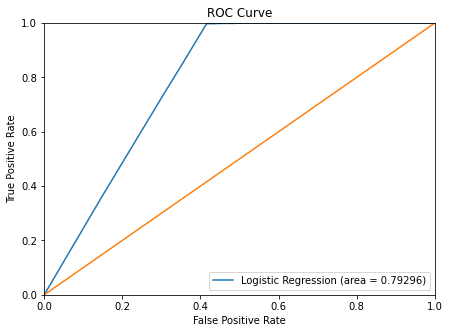

In [136]:
# plotting ROC curve on test data
fpr, tpr, thresholds = roc_curve(y_test, pred_log_sm_test)
plt.figure(figsize =(7,5))
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.5f)' % log_us_auc_test_cv)
plt.plot([0, 1], [0, 1])
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

In [137]:
import pickle

pickle.dump(logistic, open('logistic.pkl', 'wb'))

In [138]:
### yellow line is a random model
### higher the area under curve, better the performance

In [139]:
# Random forest

# Hyperparameter tuning for random forest

start = time.time()

param_rf = {
    'max_depth': [8,10],
    'min_samples_leaf': range(50, 200, 50),
    'min_samples_split':range(50, 200, 50),
    'n_estimators': [100,150,200,300], 
    'max_features': [5, 10,15,20]
    
}

rf = RandomForestClassifier(n_jobs=-1,class_weight ='balanced',random_state=42)

folds= StratifiedKFold(n_splits = 3, shuffle = True, random_state = 42)
# Instantiate 
grid_rf = RandomizedSearchCV(estimator = rf, param_distributions = param_rf, 
                          cv = folds, n_jobs = -1,verbose = 1,scoring = 'roc_auc')


#fitting
grid_rf.fit(X_train_us,y_train_us)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


RandomizedSearchCV(cv=StratifiedKFold(n_splits=3, random_state=42, shuffle=True),
                   estimator=RandomForestClassifier(class_weight='balanced',
                                                    n_jobs=-1,
                                                    random_state=42),
                   n_jobs=-1,
                   param_distributions={'max_depth': [8, 10],
                                        'max_features': [5, 10, 15, 20],
                                        'min_samples_leaf': range(50, 200, 50),
                                        'min_samples_split': range(50, 200, 50),
                                        'n_estimators': [100, 150, 200, 300]},
                   scoring='roc_auc', verbose=1)

In [140]:
#best params

grid_rf.best_params_

{'n_estimators': 150,
 'min_samples_split': 100,
 'min_samples_leaf': 150,
 'max_features': 10,
 'max_depth': 8}

In [147]:
#using best params

forest_cv = RandomForestClassifier(n_estimators=150,
                                   min_samples_split=100, min_samples_leaf=150,
                                   max_features=10,max_depth=8,
                                   n_jobs=-1,class_weight ='balanced',random_state=42)

forest_cv.fit(X_train_us,y_train_us)


#prediction

pred_rf_train_cv= forest_cv.predict_proba(X_train_us)[:,1]
pred_rf_test_cv = forest_cv.predict_proba(X_test)[:,1]

y_pred = forest_cv.predict(X_test)

end = time.time()

print ( 'Train auc score : ', roc_auc_score(y_train_us,pred_rf_train_cv))
print ( 'Test auc score : ', roc_auc_score(y_test,pred_rf_test_cv))

print(classification_report(y_test,y_pred))

rf_ex_time = end - start
rf_us_acc_test_cv = accuracy_score(y_test, y_pred)
forest_us_auc_test_cv = roc_auc_score(y_test,pred_rf_test_cv)
precision_rf_us_cv = precision_score(y_test,y_pred)
recall_rf_us_cv = recall_score(y_test,y_pred)
f1_rf_us_cv = f1_score(y_test,y_pred)

Train auc score :  0.7931474831861234
Test auc score :  0.7898029139599125
              precision    recall  f1-score   support

           0       1.00      0.58      0.74     21097
           1       0.76      1.00      0.86     27700

    accuracy                           0.82     48797
   macro avg       0.88      0.79      0.80     48797
weighted avg       0.86      0.82      0.81     48797



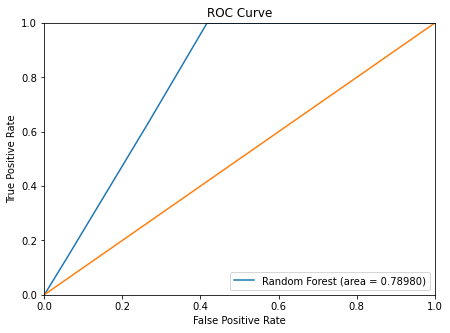

In [148]:
# plotting ROC curve on test data 
fpr, tpr, thresholds = roc_curve(y_test, pred_rf_test_cv)
plt.figure(figsize =(7,5))
plt.plot(fpr, tpr, label='Random Forest (area = %0.5f)' % forest_us_auc_test_cv )
plt.plot([0, 1], [0, 1])
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

In [149]:
# Hypertunning the xgb

start = time.time()

param_xgb = {
    'max_depth': [4,6,8],
    'learning_rate': [0.1,0.3,0.5,0.75],
    'n_estimators': [100,150,200],
    'subsample':[0.3,0.50,.75]
    
}

xgb= XGBClassifier(booster='gbtree',
       n_jobs=-1, objective='binary:logistic', random_state=42,
       reg_alpha=1, reg_lambda=0)

folds= StratifiedKFold(n_splits = 3, shuffle = True, random_state = 42)
# Instantiate
grid_xgb = RandomizedSearchCV(estimator = xgb, param_distributions = param_xgb, 
                          cv = folds, n_jobs = -1,verbose = 1,scoring = 'roc_auc')

grid_xgb.fit(X_train_us,y_train_us)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


RandomizedSearchCV(cv=StratifiedKFold(n_splits=3, random_state=42, shuffle=True),
                   estimator=XGBClassifier(base_score=None, booster='gbtree',
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, gamma=None,
                                           gpu_id=None, grow_policy=None,
                                           importance_type=None,
                                           in...
                                           max_leaves=None,
                                           min_child_weight=None, missing=nan,
                                          

In [150]:
#best parameters

grid_xgb.best_params_

{'subsample': 0.5, 'n_estimators': 100, 'max_depth': 4, 'learning_rate': 0.75}

In [152]:
xgb= XGBClassifier(booster='gbtree',subsample=0.5,
                   n_estimators = 100,
                   max_depth = 4,
                   learning_rate=0.75,
                   n_jobs=-1,objective='binary:logistic', random_state=42,
                   reg_alpha=0, reg_lambda=1)   

xgb.fit(X_train_us,y_train_us)
#prediction 

pred_xgb_train_cv= xgb.predict_proba(X_train_us)[:,1]
pred_xgb_test_cv = xgb.predict_proba(X_test)[:,1]

y_pred = xgb.predict(X_test)

end = time.time()

print ( 'Train auc score : ', roc_auc_score(y_train_us,pred_xgb_train_cv))
print ( 'Test auc score : ', roc_auc_score(y_test,pred_xgb_test_cv))
print(classification_report(y_test,y_pred))

xgb_ex_time = end - start
xgb_us_acc_test_cv = accuracy_score(y_test, y_pred)
xgb_us_auc_test_cv = roc_auc_score(y_test,pred_xgb_test_cv)
precision_xgb_us_cv = precision_score(y_test,y_pred)
recall_xgb_us_cv = recall_score(y_test,y_pred)
f1_xgb_us_cv = f1_score(y_test,y_pred)

Train auc score :  0.793148668076392
Test auc score :  0.7906307302576427
              precision    recall  f1-score   support

           0       1.00      0.58      0.74     21097
           1       0.76      1.00      0.86     27700

    accuracy                           0.82     48797
   macro avg       0.88      0.79      0.80     48797
weighted avg       0.86      0.82      0.81     48797



In [153]:
#SCORE after RandomUnderSampling

execution_times_all = [log_ex_time, rf_ex_time, xgb_ex_time]
accuracy_all = [log_us_acc_test_cv, rf_us_acc_test_cv, xgb_us_acc_test_cv]
auc_score_all =[log_us_auc_test_cv, forest_us_auc_test_cv, xgb_us_auc_test_cv]
recall_all = [recall_log_us_cv, recall_rf_us_cv, recall_xgb_us_cv]
precision_all = [precision_log_us_cv, precision_rf_us_cv, precision_xgb_us_cv]
f1_all =[f1_log_us_cv, f1_rf_us_cv, f1_xgb_us_cv]

us_cv = pd.DataFrame({'exec_times': execution_times_all,
                      'accuracy': accuracy_all,
                      'auc_score': auc_score_all,
                      'recall':recall_all,
                      'precision':precision_all,\
                      'f1_score':f1_all},
                     index =['Logistic Regression','Random Forest','XGBoost'])
us_cv

,exec_times,accuracy,auc_score,recall,precision,f1_score
Logistic Regression,10.902372,0.816157,0.792958,0.990036,0.759268,0.859431
Random Forest,143.165427,0.819210,0.789803,0.998736,0.758943,0.862483
XGBoost,152.121190,0.820091,0.790631,0.999892,0.759384,0.863198
